這份程式是為了輔助說明李宏毅教授《生成式人工智慧及機器學習導論》第三講的觀念，目的是透過執行此程式，讓學生更清楚理解大型語言模型內部的類神經網路如何運作。在開始執行之前，請先點選上方工具列的「檔案」，選擇「在雲端硬碟中儲存副本」，再於自己的副本中進行操作。

In [ ]:
!pip install -U transformers #安裝 HuggingFace Transformers 套件


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [25]:
import torch

以下程式碼將登入 Hugging Face Hub，以便接下來取得模型。但在此之前，我們需先取得 Hugging Face 的「Token」（此處的 Token 指的是認證憑證，與生成式 AI 中的 token 無關）。有關 Hugging Face Token 的取得與使用方式，請參閱作業一助教投影片：https://speech.ee.ntu.edu.tw/~hylee/GenAI-ML/2025-fall-course-data/hw1.pdf

In [ ]:
from huggingface_hub import login
login(new_session=False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


我們將下載位於此頁面的模型：https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct

如果你之前沒有使用過這個模型，在上述頁面中你可能會看到一行提示：「You need to agree to share your contact information to access this model」。這是因為使用 Llama 模型需要先簽署使用者同意書（並不是每個模型都需要簽署同意書）。請依照該頁面上的指示完成簽署，之後你會收到一封通知信，告知審查是否通過，通過後才能開始使用。這個過程有時可能需要數個小時。詳情請參閱助教投影片。

執行以下程式碼後，我們會從 Hugging Face Hub 下載 tokenizer 和 model 兩個物件。tokenizer 紀錄了模型所使用的 token，而 model 則儲存了模型的參數。下載過程可能需要數分鐘，請耐心等候。

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("S")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
#如果是 Colab 的免費使用者，可能會無法載入 3B 模型，這個時候可以把 3B 換成 1B
# 大约3min

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
#如果是 Colab 的免費使用者，可能會無法載入 3B 模型，這個時候可以把 3B 換成 1B
# 大约3min

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

c:\Users\zhen-\anaconda3\envs\torch_cuda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\zhen-\.cache\huggingface\hub\models--meta-llama--Llama-3.2-1B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
#如果是 Colab 的免費使用者，可能會無法載入 3B 模型，這個時候可以把 3B 換成 1B
# 大约3min

我們另外下載位於此頁面的模型: https://huggingface.co/google/gemma-3-4b-it

In [4]:
tokenizer2 = AutoTokenizer.from_pretrained("google/gemma-3-4b-it")
model2 = AutoModelForCausalLM.from_pretrained("google/gemma-3-4b-it")
#如果是 Colab 的免費使用者，可能會無法跑第二的模型, 這時請將這個 block 直接註解掉

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# 我們來看看 model 中有什麼

我們先來看看我們載入的模型總共有幾個參數。model是Llama-3.2-3B-Instruct，model2是google/gemma-3-4b-it

``model.num_parameters()`` 會告訴我們 ``model`` 的參數量

In [ ]:
model.num_parameters() #我們來看看 model (meta-llama/Llama-3.2-1B-Instruct) 的參數量

1235814400

In [5]:
model2.num_parameters() #我們來看看 model2 (google/gemma-3-4b-it) 的參數量

4300079472

深度學習模型的參數通常以多個矩陣（Matrix）和向量（Vector）的形式儲存（向量、矩陣等統稱為張量（Tensor））。  

在模型中，每個包含參數的張量在 `model` 中具有以下資訊：  

- **名稱（name）**：表示該參數在模型結構中的位置，例如 `model.layers.0.mlp.up_proj.weight`，這是第一個 transformer layer 中第一層 MLP 的參數。  
- **形狀（shape）**：表示該張量的維度，例如 `(8192, 3072)`，代表這是一個矩陣，其中一維為 8192，另一維為 3072。  

我們可以用 `named_parameters()` 方法來逐一查看這些參數。


In [ ]:
print( len(list(model.named_parameters())) )
#根據輸出，Llama-3.2-1B-Instruct 有幾層呢？

146


In [8]:
# for name, param in model.named_parameters():
#     print(f"{name:80}  |  shape: {tuple(param.shape)}")
for name, param in model2.named_parameters():
    print(f"{name:80}  |  shape: {tuple(param.shape)}")

#比較看看，model (Llama-3.2-3B-Instruct) 和 model 2 (google/gemma-3-4b-it) 有什麼不同？

model.vision_tower.vision_model.embeddings.patch_embedding.weight                 |  shape: (1152, 3, 14, 14)
model.vision_tower.vision_model.embeddings.patch_embedding.bias                   |  shape: (1152,)
model.vision_tower.vision_model.embeddings.position_embedding.weight              |  shape: (4096, 1152)
model.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight               |  shape: (1152,)
model.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias                 |  shape: (1152,)
model.vision_tower.vision_model.encoder.layers.0.self_attn.k_proj.weight          |  shape: (1152, 1152)
model.vision_tower.vision_model.encoder.layers.0.self_attn.k_proj.bias            |  shape: (1152,)
model.vision_tower.vision_model.encoder.layers.0.self_attn.v_proj.weight          |  shape: (1152, 1152)
model.vision_tower.vision_model.encoder.layers.0.self_attn.v_proj.bias            |  shape: (1152,)
model.vision_tower.vision_model.encoder.layers.0.self_attn.q_proj.weight   

用 `model.state_dict()` 可以實際把參數拿出來看看

In [9]:
model.state_dict()

OrderedDict([('model.embed_tokens.weight',
              tensor([[ 3.1281e-03,  1.7822e-02,  2.0996e-02,  ..., -5.2185e-03,
                       -4.1992e-02, -3.3447e-02],
                      [ 2.3682e-02, -2.2949e-02,  1.9897e-02,  ..., -9.4604e-03,
                       -2.2125e-03, -3.9551e-02],
                      [ 1.4465e-02,  1.0559e-02,  9.8267e-03,  ...,  6.8359e-03,
                       -1.1597e-02,  5.7983e-03],
                      ...,
                      [-1.0580e-06,  1.0620e-02, -1.9043e-02,  ...,  1.3885e-03,
                       -1.7700e-03,  9.7046e-03],
                      [-1.3635e-06,  1.0620e-02, -1.9043e-02,  ...,  1.3885e-03,
                       -1.7700e-03,  9.7046e-03],
                      [-1.1921e-06,  1.0620e-02, -1.9043e-02,  ...,  1.3885e-03,
                       -1.7700e-03,  9.7046e-03]])),
             ('model.layers.0.self_attn.q_proj.weight',
              tensor([[-0.0179,  0.0066,  0.0247,  ..., -0.0087, -0.0117,  0.0201],
 

[[-8.36181641e-03  1.13525391e-02  4.10156250e-02 ... -1.86767578e-02
   2.23388672e-02  1.28784180e-02]
 [-4.83398438e-02  7.29370117e-03 -5.73730469e-03 ...  3.14941406e-02
  -1.24511719e-02  3.32641602e-03]
 [-1.16577148e-02 -6.46972656e-03 -2.38037109e-03 ... -1.85546875e-02
   8.97216797e-03  2.03857422e-02]
 ...
 [-5.43212891e-03  2.91442871e-03 -1.07421875e-02 ... -1.25885010e-03
  -1.73339844e-02  1.95312500e-02]
 [ 1.01928711e-02 -5.96046448e-05  6.34765625e-03 ...  3.87573242e-03
   7.81250000e-03 -2.11181641e-02]
 [-5.52368164e-03 -2.72216797e-02 -2.15148926e-03 ... -1.78222656e-02
   6.98852539e-03  4.78744507e-04]]


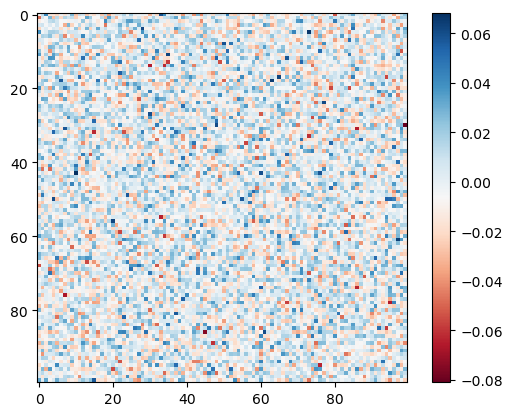

In [11]:
weight = model.state_dict()["model.layers.13.mlp.up_proj.weight"].numpy()
#weight = model.state_dict()["model.layers.27.mlp.up_proj.weight"].numpy()

#上面這段程式碼可以分成三個步驟來看：1. state_dict() 2. ["參數名稱"] 3. .numpy()
# model.state_dict() 方法會回傳一個字典（dict），其鍵（key）為參數名稱，值（value）為張量（Tensor）。
# 可以使用 [] 根據 key 取得對應的 value。
# 這裡的 value 是一個 PyTorch Tensor，.numpy() 會把 Tensor 轉成 NumPy 格式的陣列

print(weight)

#把 weight 中前100×100區塊畫出來
import matplotlib.pyplot as plt
plt.imshow(weight[:100, :100], cmap="RdBu")
plt.colorbar()
plt.show()

#其實看不出甚麼名堂，對吧 ....

## 觀察語言模型中的 Embedding Table

In [12]:
#先取出model中的 embedding table

input_embedding = model.state_dict()["model.embed_tokens.weight"].numpy()

先來看看 input_embedding 的形狀（shape）。

In [13]:
'''
把 input_embedding 的 shape 輸出出來觀察看看

你會看到 `(128256, 3072)`，表示 `input_embedding` 是一個具有 128,256 列（row）和 3,072 行（column）的矩陣。

- **128256** → 詞彙表（vocabulary）的大小，共有 128,256 個不同的 token。
- **3072** → 每個 token 以一個 3,072 維度的向量表示。

換句話說，每一列（row）對應到一個 token。
'''

print(input_embedding.shape)

(128256, 2048)


In [14]:
#把 input_embedding 輸出出來觀察看看
print(input_embedding)

#嗯 ... 其實還是看不出甚麼名堂

[[ 3.1280518e-03  1.7822266e-02  2.0996094e-02 ... -5.2185059e-03
  -4.1992188e-02 -3.3447266e-02]
 [ 2.3681641e-02 -2.2949219e-02  1.9897461e-02 ... -9.4604492e-03
  -2.2125244e-03 -3.9550781e-02]
 [ 1.4465332e-02  1.0559082e-02  9.8266602e-03 ...  6.8359375e-03
  -1.1596680e-02  5.7983398e-03]
 ...
 [-1.0579824e-06  1.0620117e-02 -1.9042969e-02 ...  1.3885498e-03
  -1.7700195e-03  9.7045898e-03]
 [-1.3634562e-06  1.0620117e-02 -1.9042969e-02 ...  1.3885498e-03
  -1.7700195e-03  9.7045898e-03]
 [-1.1920929e-06  1.0620117e-02 -1.9042969e-02 ...  1.3885498e-03
  -1.7700195e-03  9.7045898e-03]]


In [15]:
#編號為 `token_id` 的 token，其對應的 embedding 就是 `input_embedding` 的第 `token_id` 個列（row）（從 0 開始計數）。
#以下輸出編號為 `token_id` 的 token 以及其對應的 embedding。

token_id = 2

# 從 tokenizer 取得對應 token_id 的 token（文字）
token = tokenizer.decode(token_id)

# 取得該 token 的向量
embedding_vector = input_embedding[token_id]

print(f"Token ID: {token_id}")
print(f"對應的 Token: {token}")
print(f"Token Embedding: {embedding_vector}")

Token ID: 2
對應的 Token: #
Token Embedding: [ 0.01446533  0.01055908  0.00982666 ...  0.00683594 -0.01159668
  0.00579834]


直接觀察 embedding 的數值其實看不出太多資訊，但我們可以計算 token 之間的 embedding 相似程度
這樣就能知道對於這個語言模型來說，哪些 token 的意義是相似的。
這段程式是要讓我們：
1. 輸入一個 token（例如 `"apple"`）  
2. 找到它的 `token_id` （例如 `"apple"`）
3. 根據 `token_id` 從 `input_embedding` 中取得它的 embedding  
4. 使用 cosine similarity 計算它與其他所有 token 的 embedding 相似程度  
5. 列出最相近的前 `top_k` 個 token

In [16]:
top_k = 20 #自己設定一個數值

# 1️⃣ 讓使用者輸入一個 token
token = input('請輸入一個 token：') #輸入: apple, Apple, 李, 王 等等

# 2️⃣ 轉換成 token ID
token_id = tokenizer.encode(token)[1]
# 為什麼是 [1]？
# tokenizer.encode() 回傳的是: [BOS_token_id, token_id ...]
# print (tokenizer.encode(token)) <- 跑這一行試試看
# 第一個元素 [0] 是特殊起始符號 (BOS)，
# 我們真正想要的是輸入的那個 token 本身 → 所以取 index 1
print("token id 是 ",token_id)

# 3️⃣ 取得 token 的 embedding
embbeding = [input_embedding[token_id]]

# 4️⃣ 計算餘弦相似度
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(embbeding, input_embedding)[0]

# 5️⃣ 排序並取最相近 top_k,並輸出結果
nearest = sims.argsort()[::-1][1: top_k+1] #排除自己本身
print(f'和 {token} 最相近的 {top_k} 個 token：')
for idx in nearest:
  print(f'{tokenizer.decode(idx)} (score: {sims[idx]:.4f})')

token id 是  23182
和 apple 最相近的 20 個 token：
APPLE (score: 0.6469)
Apple (score: 0.6161)
 apple (score: 0.6093)
 APPLE (score: 0.5728)
 Apple (score: 0.5423)
苹果 (score: 0.4817)
/apple (score: 0.4759)
 apples (score: 0.4680)
.apple (score: 0.3899)
 яб (score: 0.3555)
app (score: 0.3205)
-app (score: 0.3173)
	app (score: 0.3164)
_app (score: 0.3093)
(app (score: 0.2949)
.APP (score: 0.2866)
 pineapple (score: 0.2864)
.App (score: 0.2796)
 iphone (score: 0.2785)
_FieldOffsetTable (score: 0.2783)


## 輸出每一層的 representation

把每一層的 representation 都取出來

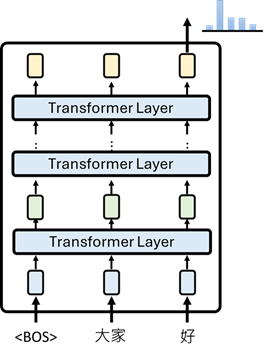

In [17]:
inputs = tokenizer.encode("大家好", return_tensors="pt")

print("編碼後的 Token IDs：", inputs)

# ====>>>output_hidden_states=True 才會回傳每一層的 representation (hidden states)
outputs = model(inputs, output_hidden_states=True)

hidden_states = outputs.hidden_states
# hidden_states[0] -> embedding （把 token 轉成 token embedding 的結果)
# hidden_states[1] ~ hidden_states[N] -> 每一層 Transformer block 的輸出
print(f"一共拿到 {len(hidden_states)} 層 representation（包含 token embedding）。")

# 列出每層輸出的形狀
for idx, h in enumerate(hidden_states):
    print(f"Layer {idx:2d} 輸出形狀: {h.shape}")
    # h.shape = [batch_size, seq_len, hidden_size]
    # batch_size → 一次處理的句子數
    # sequence_length → 句子被切成多少 token
    # hidden_size → 每個 token 的向量長度


print("\n=== Token Embedding 輸出 ===")
print(hidden_states[0])

print("\n=== 第一個 Transformer Layer 的輸出 ===")
print(hidden_states[1])

編碼後的 Token IDs： tensor([[128000, 109429,  53901]])
一共拿到 17 層 representation（包含 token embedding）。
Layer  0 輸出形狀: torch.Size([1, 3, 2048])
Layer  1 輸出形狀: torch.Size([1, 3, 2048])
Layer  2 輸出形狀: torch.Size([1, 3, 2048])
Layer  3 輸出形狀: torch.Size([1, 3, 2048])
Layer  4 輸出形狀: torch.Size([1, 3, 2048])
Layer  5 輸出形狀: torch.Size([1, 3, 2048])
Layer  6 輸出形狀: torch.Size([1, 3, 2048])
Layer  7 輸出形狀: torch.Size([1, 3, 2048])
Layer  8 輸出形狀: torch.Size([1, 3, 2048])
Layer  9 輸出形狀: torch.Size([1, 3, 2048])
Layer 10 輸出形狀: torch.Size([1, 3, 2048])
Layer 11 輸出形狀: torch.Size([1, 3, 2048])
Layer 12 輸出形狀: torch.Size([1, 3, 2048])
Layer 13 輸出形狀: torch.Size([1, 3, 2048])
Layer 14 輸出形狀: torch.Size([1, 3, 2048])
Layer 15 輸出形狀: torch.Size([1, 3, 2048])
Layer 16 輸出形狀: torch.Size([1, 3, 2048])

=== Token Embedding 輸出 ===
tensor([[[ 0.0027,  0.0031, -0.0068,  ...,  0.0011,  0.0008,  0.0015],
         [ 0.0045,  0.0466,  0.0139,  ...,  0.0089, -0.0110,  0.0081],
         [-0.0195,  0.0123, -0.0011,  ...,  0.0286,  

讓我們來比較不同輸入的 representation

In [18]:
def get_embedding(text, layer_num):
    """
    輸入一句文字，印出模型某一個 layer 的每個 token 的 embedding。

    """
    print(f"\n=== {text} ===")
# "pt" is short for "PyTorch".
    inputs = tokenizer.encode(text, return_tensors="pt", add_special_tokens=False)
    #print(inputs)

    outputs = model(inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states
    hidden_states_layer = hidden_states[layer_num]

    tokens = tokenizer.tokenize(text)
    seq_length = len(tokens)
    for t in range(0,seq_length):
      print(tokens[t], ":", hidden_states_layer[0][t])

layer_num = 10 # 0: token embedding, >0: contextualized token embedding
get_embedding("How about you?", layer_num )
get_embedding("How are you?", layer_num )
get_embedding("Nice to meet you.", layer_num )
# 带一点的开头大G表示空白符
# 三个you的embeding 不同


=== How about you? ===
How : tensor([-0.0230,  0.0981,  0.1788,  ..., -0.0939, -0.0524,  0.0876],
       grad_fn=<SelectBackward0>)
Ġabout : tensor([-0.0248, -0.0692, -0.2249,  ...,  0.1951, -0.1054,  0.1698],
       grad_fn=<SelectBackward0>)
Ġyou : tensor([-0.1685,  0.0558, -0.1226,  ...,  0.0410,  0.1521,  0.0850],
       grad_fn=<SelectBackward0>)
? : tensor([-0.2427,  0.0101,  0.0130,  ..., -0.0910,  0.0295,  0.0137],
       grad_fn=<SelectBackward0>)

=== How are you? ===
How : tensor([-0.0230,  0.0981,  0.1788,  ..., -0.0939, -0.0524,  0.0876],
       grad_fn=<SelectBackward0>)
Ġare : tensor([-0.0595, -0.0550, -0.0939,  ..., -0.1044, -0.0904,  0.0538],
       grad_fn=<SelectBackward0>)
Ġyou : tensor([-0.1886, -0.1919,  0.0226,  ...,  0.0942, -0.0635,  0.1686],
       grad_fn=<SelectBackward0>)
? : tensor([-0.2078, -0.0463,  0.0513,  ..., -0.1653, -0.0566, -0.0393],
       grad_fn=<SelectBackward0>)

=== Nice to meet you. ===
Nice : tensor([-0.0618, -0.0529,  0.5550,  ..., -0.23

In [ ]:
?tokenizer.encode
# Right side are the help info ===>>>>>

In [19]:
?return_tensors

Object `return_tensors` not found.


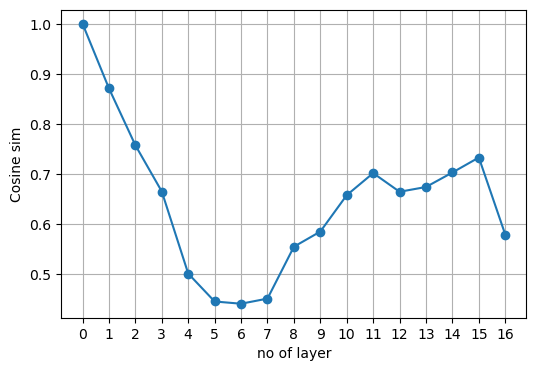

In [20]:
#比較 sentence1 和 sentence2 中的 "apple" ，在不同層的相似程度

sentence1 = "I ate an apple for breakfast."
idx1 = 4 # apple 在 "I ate an apple for breakfast." 的位置
#[128000, 40, 30912, 459, 24149, 369, 17954, 13]
sentence2 = "The company that brought us the iPad and AirPods is apple."
idx2 = 13 # apple 在 "The tech company apple announced its earnings yesterday." 的位置
#[128000, 791, 2883, 430, 7263, 603,  279, 23067, 323, 6690, 24434, 82,374,  24149, 13]

inputs1 = tokenizer.encode(sentence1,return_tensors="pt")
outputs1 = model(inputs1, output_hidden_states=True)
hidden_states1 = outputs1.hidden_states

inputs2 = tokenizer.encode(sentence2,return_tensors="pt")
outputs2 = model(inputs2, output_hidden_states=True)
hidden_states2 = outputs2.hidden_states

# 計算每一層的 cosine_similarity
distances = []
for l in range(len(hidden_states)):
    vec1 = hidden_states1[l][0][idx1].detach().numpy()  # 句子1 中 '▁apple' 的向量
    vec2 = hidden_states2[l][0][idx2].detach().numpy()  # 句子2 中 '▁apple' 的向量
    cos_sim = cosine_similarity([vec1], [vec2])[0]
    #print(cos_sim)
    distances.append(cos_sim)

# 繪製距離隨層數變化圖
layers = list(range(len(distances)))
plt.figure(figsize=(6, 4))
plt.plot(layers, distances, marker='o')
plt.xticks(layers)
plt.xlabel("no of layer")
plt.ylabel("Cosine sim")
plt.grid(True)
plt.show()

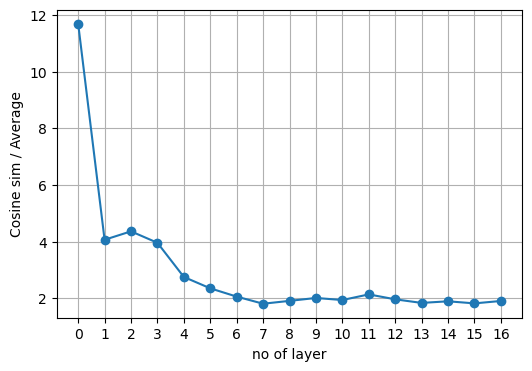

In [ ]:
sentence1 = "I ate an apple for breakfast."
sentence2 = "The company that brought us the iPad and AirPods is apple."

inputs1 = tokenizer.encode(sentence1, return_tensors="pt")
outputs1 = model(inputs1, output_hidden_states=True)
hidden_states1 = outputs1.hidden_states

inputs2 = tokenizer.encode(sentence2, return_tensors="pt")
outputs2 = model(inputs2, output_hidden_states=True)
hidden_states2 = outputs2.hidden_states

distances = []
for l in range(len(hidden_states)):
    layer_hidden_states1 = hidden_states1[l][0].detach().numpy() # Shape: [seq_len1, hidden_size]
    layer_hidden_states2 = hidden_states2[l][0].detach().numpy() # Shape: [seq_len2, hidden_size]

    ##########################
    # Calculate pairwise cosine similarity between all tokens in sentence1 and sentence2 for this layer
    pairwise_sim = cosine_similarity(layer_hidden_states1, layer_hidden_states2) # Shape: [seq_len1, seq_len2]
    avg_sim_layer = pairwise_sim.mean()       ## <<===================== 需要依照本层的均值做标准化

    vec1 = hidden_states1[l][0][idx1].detach().numpy()  # 句子1 中 '▁apple' 的向量
    vec2 = hidden_states2[l][0][idx2].detach().numpy()  # 句子2 中 '▁apple' 的向量


    cos_sim = cosine_similarity([vec1], [vec2])[0]

    distances.append(cos_sim/avg_sim_layer)

# 繪製距離隨層數變化圖
layers = list(range(len(distances)))
plt.figure(figsize=(6, 4))
plt.plot(layers, distances, marker='o')
plt.xticks(layers)
plt.xlabel("no of layer")
plt.ylabel("Cosine sim / Average")
plt.grid(True)
plt.show()

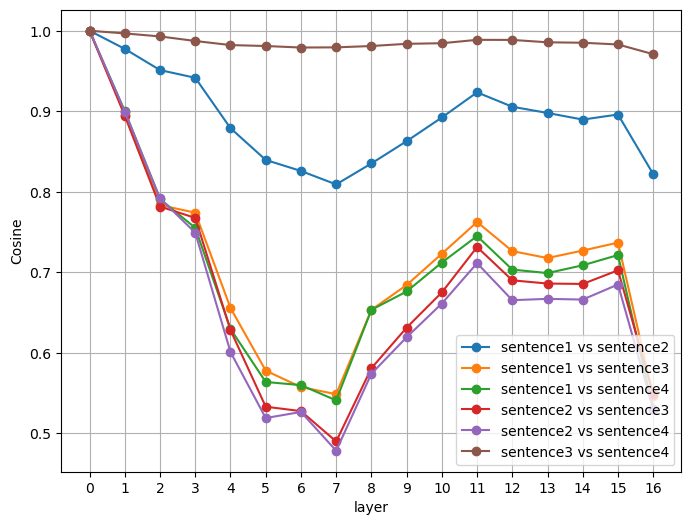

In [23]:
# 定義 4 個句子：前兩句是「可食用的 apple」，後兩句是「Apple 公司」
sentences = [
    "I ate an apple for breakfast.",                 # 可食用的 apple 範例 1
    "She baked an apple pie for dessert.",              # 可食用的 apple 範例 2
    "The tech giant apple announced its quarterly earnings.",    # Apple 公司範例 1
    "Last week the tech giant apple revealed its new iPhone."    # Apple 公司範例 2
]
num_sentences = 4

# 編碼並取得所有層的 hidden_states
hidden_states_batch = []
for i in range(num_sentences):
  inputs = tokenizer.encode(sentences[i], return_tensors="pt")
  #print(inputs)
  outputs = model(inputs, output_hidden_states=True)
  hidden_states_batch.append(outputs.hidden_states)

# 每句中 'apple' 的索引位置
idxs = [4,4,4,6]

# 為每一對句子組合準備相似度儲存結構
pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
sim_dict = {pair: [] for pair in pairs}

# 逐層計算每對組合的 Cosine 相似度
#num_layer = 28 ## <<<<<<<<<<<<<<================
num_layer = 16 ## <<<<<<<<<<<<<<================
for l in range(num_layer+1):
    for (i, j) in pairs:
        vec_i = hidden_states_batch[i][l][0][idxs[i]].detach().numpy()
        vec_j = hidden_states_batch[j][l][0][idxs[j]].detach().numpy()
        sim = cosine_similarity([vec_i], [vec_j])[0]
        sim_dict[(i, j)].append(sim)

# 繪製每對組合隨層數變化的相似度曲線
layers = list(range(len(hidden_states)))  # 0 = embedding 層
plt.figure(figsize=(8, 6))
for (i, j), sims in sim_dict.items():
    label = f"sentence{i+1} vs sentence{j+1}"
    plt.plot(layers, sims, marker='o', label=label)

plt.xticks(layers)
plt.xlabel("layer")
plt.ylabel("Cosine")
plt.legend()
plt.grid(True)
plt.show()

## 以 logit lens 解析 representation


在典型的語言模型使用中，輸入的 token 會經過多層 Transformer layer 的運算，每一層都會產生一組 representation。我們通常只取最後一層的表示，透過 Unembedding (LM head) 將其轉換到詞彙表大小的空間，得到每個 token 的 logit，最後再經由 softmax 得到下一個 token 的機率分布。換言之，我們平常只關注「最後的輸出層」。

Logit lens 的核心想法是：其實不一定要等到最後一層，我們可以在每一層的 representation 上套用相同的 Unembedding，來觀察如果「此時就直接拿來預測 token」，模型會認為最有可能的輸出是什麼。這樣做就像替每一層「戴上一副眼鏡」來觀察：模型在中間層時，腦中已經傾向哪些詞彙？隨著層數加深，模型又是如何逐步收斂到最終答案的呢？

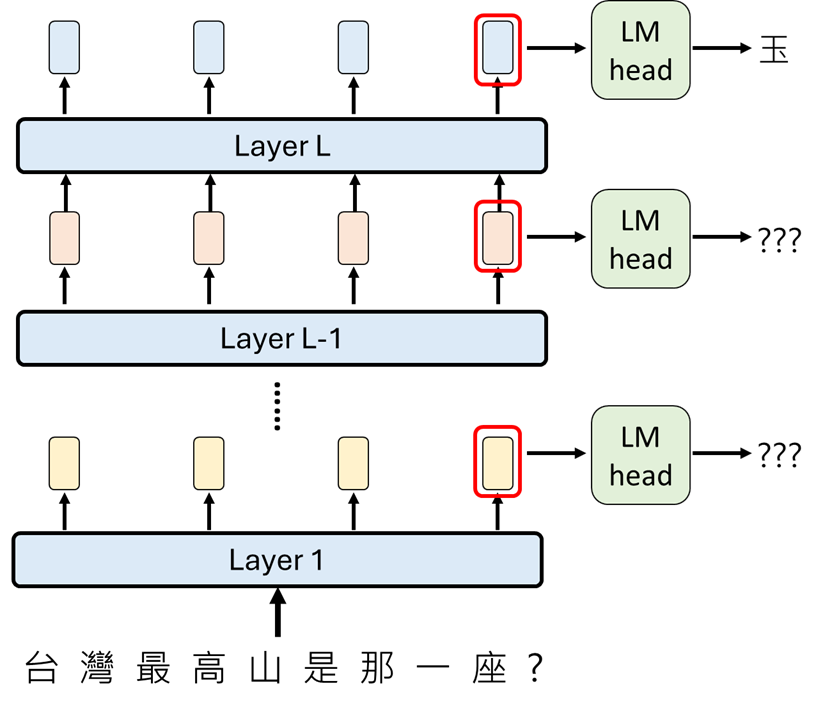

In [26]:
text = "天氣" #天氣, 今天天氣真 ...

input_ids = tokenizer.encode(text, return_tensors="pt")
outputs = model(input_ids, output_hidden_states=True)
hidden_states = outputs.hidden_states  # 長度 = layer 數 + 1
print(f"一共拿到 {len(hidden_states)} 層 representation （包含 token embedding）。")

for l in range(len(hidden_states)):
    # 用該層 hidden state 經過 lm_head 得到 logits
    logits = model.lm_head(hidden_states[l])   # [batch, seq_len, vocab_size]

    # 取最後一個 token 的 logits
    last_token_logits = logits[0, -1]  # [vocab_size]

    # 選分數最高的 token
    next_token_id = torch.argmax(last_token_logits)

    # 轉成字
    print(f"Layer {l:2d} → {tokenizer.decode(next_token_id)}")

一共拿到 17 層 representation （包含 token embedding）。
Layer  0 → 氣
Layer  1 → 氣
Layer  2 → 氣
Layer  3 → 氣
Layer  4 →  weather
Layer  5 →  weather
Layer  6 →  weather
Layer  7 →  weather
Layer  8 → /weather
Layer  9 → Weather
Layer 10 → Weather
Layer 11 → /weather
Layer 12 → Weather
Layer 13 → /weather
Layer 14 → Weather
Layer 15 →  forecast
Layer 16 → 狀


## 觀察 Attention 在做甚麼

In [27]:
#text  = "how are you"
text = "The apple is green. What color is the apple?"

tokens = tokenizer.tokenize(text,add_special_tokens=True)
inputs = tokenizer.encode(text, return_tensors="pt")
model.config._attn_implementation = "eager"    #<<<===========
#為什麼需要這個? 告訴模型請老老實實用普通 PyTorch 一步步算 attention，不要用快的方法，這樣 attentions 才會有內容。
outputs = model(inputs, output_attentions=True) #<<<===========


'''
# 把上面幾行的 model -> model2, tokenizer ->　tokenizer2 ，就可以把 llama 換成 gemma 了
tokens = tokenizer2.tokenize(text,add_special_tokens=True)
inputs = tokenizer2.encode(text, return_tensors="pt")
model2.config._attn_implementation = "eager"
outputs = model2(inputs, output_attentions=True)
'''

attentions = outputs.attentions
print(f"總共有 {len(attentions)} 層")
for i, layer_attn in enumerate(attentions):
    print(f"Layer {i} attention shape: {layer_attn.shape}")

# 每一層的 attention 權重張量形狀都是 [1, 24, L, L]。
# 1 → batch_size (一次只輸入一段文字，所以 batch_size = 1)
# 24 → num_head


總共有 16 層
Layer 0 attention shape: torch.Size([1, 32, 12, 12])
Layer 1 attention shape: torch.Size([1, 32, 12, 12])
Layer 2 attention shape: torch.Size([1, 32, 12, 12])
Layer 3 attention shape: torch.Size([1, 32, 12, 12])
Layer 4 attention shape: torch.Size([1, 32, 12, 12])
Layer 5 attention shape: torch.Size([1, 32, 12, 12])
Layer 6 attention shape: torch.Size([1, 32, 12, 12])
Layer 7 attention shape: torch.Size([1, 32, 12, 12])
Layer 8 attention shape: torch.Size([1, 32, 12, 12])
Layer 9 attention shape: torch.Size([1, 32, 12, 12])
Layer 10 attention shape: torch.Size([1, 32, 12, 12])
Layer 11 attention shape: torch.Size([1, 32, 12, 12])
Layer 12 attention shape: torch.Size([1, 32, 12, 12])
Layer 13 attention shape: torch.Size([1, 32, 12, 12])
Layer 14 attention shape: torch.Size([1, 32, 12, 12])
Layer 15 attention shape: torch.Size([1, 32, 12, 12])


[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.43396091e-01 5.66039942e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.56350660e-01 9.54619199e-02 4.81874272e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.39909256e-01 9.53798071e-02 4.01268415e-02 2.45841052e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.05479300e-01 8.54187179e-03 6.48589805e-02 1.15787193e-01
  2.05332682e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.85093701e-01 3.73585001e-02 7.01391026e-02 8.64391997e-02
  7

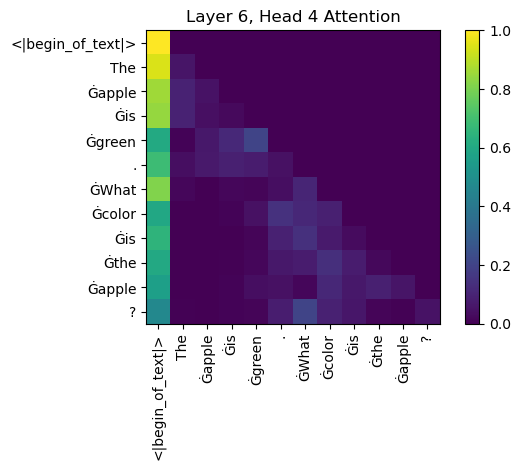

In [28]:
layer_idx = 5  #假設我們想觀察第 6 層      (layer_idx=5)
head_idx  = 3  #假設我們想觀察第 7 個 Head ( head_idx=6) 的注意力分佈 #可以把 6 改成其他數字，例如: 5,4,3

attn_matrix = attentions[layer_idx][0][head_idx].detach().numpy()
print(attn_matrix)

import matplotlib.pyplot as plt # Import matplotlib here
plt.imshow(attn_matrix, cmap="viridis")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.title(f"Layer {layer_idx+1}, Head {head_idx+1} Attention")
plt.colorbar()
plt.tight_layout()
plt.show()

#你會看到一個 L X L 的矩陣，嘗試解讀你看到了什麼? 為什麼右上角都是0

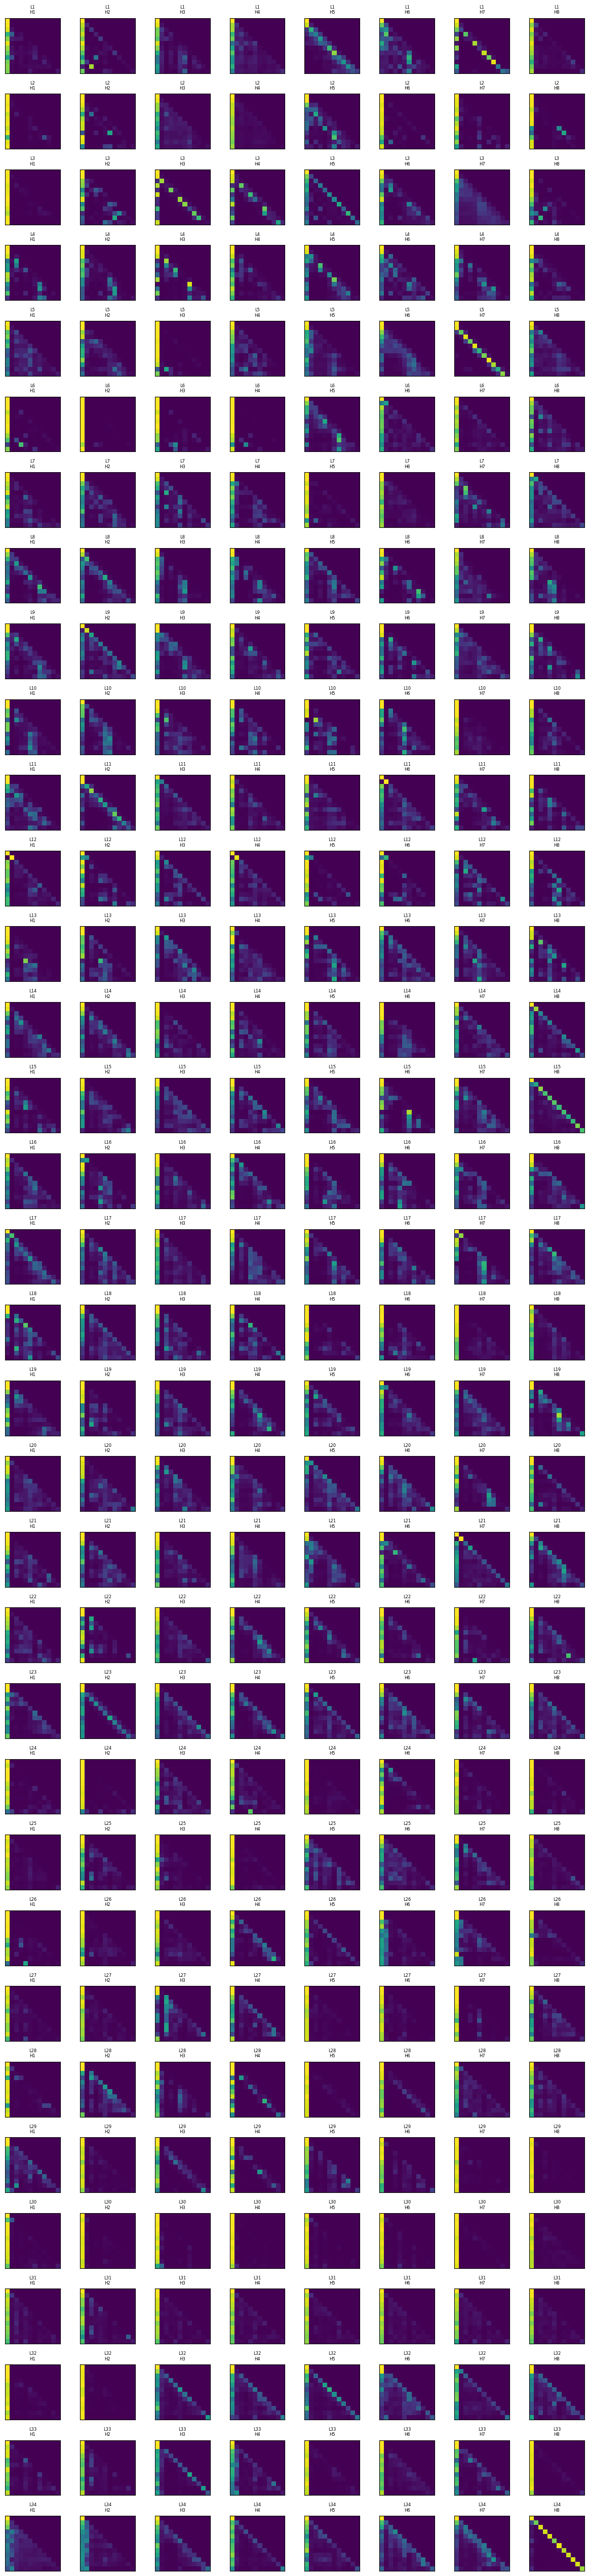

In [ ]:
num_layers = len(attentions)
num_heads = attentions[0].shape[1]  # 每層 head 數

# 建立總圖
fig, axes = plt.subplots(num_layers, num_heads, figsize=(num_heads*1.5, num_layers*1.5))
if num_layers == 1 and num_heads == 1:
    axes = [[axes]]
elif num_layers == 1:
    axes = [axes]
elif num_heads == 1:
    axes = [[ax] for ax in axes]

# 畫每個子圖
for layer_idx in range(num_layers):
    for head_idx in range(num_heads):
        ax = axes[layer_idx][head_idx]
        attn_matrix = attentions[layer_idx][0, head_idx].detach().cpu().numpy()
        ax.imshow(attn_matrix, cmap="viridis")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"L{layer_idx+1}\nH{head_idx+1}", fontsize=6)

#plt.suptitle("Attention Maps (Layer × Head)", fontsize=14)
plt.tight_layout()
plt.show()

試試看有沒有辦法把 gemma 的 attention 畫出來，看看有什麼不一樣？